In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import random

In [2]:
TRAIN_DIR=r"C:\Users\speed\Documents\Playing Cards Classification TensorFlow CNN\data\train"

# Initialize TensorBoard

In [3]:
tsb=tf.keras.callbacks.TensorBoard(log_dir="logs")

# Create String Labels

In [4]:
classes=[i for i in os.listdir(TRAIN_DIR)]

# Create Training Dataset

In [5]:
train=[]
for i in os.listdir(TRAIN_DIR):
    current_path=os.path.join(TRAIN_DIR,i)
    current_class=classes.index(i)
    for j in os.listdir(current_path):
        try:
            img=cv2.imread(os.path.join(TRAIN_DIR,i,j),cv2.IMREAD_GRAYSCALE)
            img=cv2.resize(img,(70,70))
        except:
            continue
        train.append([img,current_class])
random.shuffle(train)
x=[]
y=[]
for i,j in train:
    x.append(i)
    y.append(j)
x=np.array(x)/255.0
y=np.array(y)
print(f"Total Train Images : {len(x)}")

Total Train Images : 7509


# Create Model

In [6]:
model=tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64,(3,3),activation=tf.nn.relu,input_shape=(70,70,1)),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(64,(3,3),activation=tf.nn.relu),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(64,(3,3),activation=tf.nn.relu),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512,activation=tf.nn.relu),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(256,activation=tf.nn.relu),
    tf.keras.layers.Dense(len(classes),activation=tf.nn.softmax)
])

# Get Summary Of Model

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 68, 68, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 34, 34, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 7, 7, 64)         0

# Compile The Model

In [8]:
model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

# Train The Model

In [9]:
history=model.fit(x,y,epochs=100,callbacks=[tsb],validation_split=0.1)

Epoch 1/100
212/212 [==============================] - 44s 207ms/step - loss: 3.2414 - accuracy: 0.1421 - val_loss: 2.3964 - val_accuracy: 0.3076
Epoch 2/100
212/212 [==============================] - 45s 213ms/step - loss: 2.1090 - accuracy: 0.3727 - val_loss: 1.8893 - val_accuracy: 0.4727
Epoch 3/100
212/212 [==============================] - 45s 214ms/step - loss: 1.5702 - accuracy: 0.5491 - val_loss: 1.4927 - val_accuracy: 0.5859
Epoch 4/100
212/212 [==============================] - 49s 230ms/step - loss: 1.1860 - accuracy: 0.6588 - val_loss: 1.3934 - val_accuracy: 0.6272
Epoch 5/100
212/212 [==============================] - 41s 191ms/step - loss: 0.9206 - accuracy: 0.7342 - val_loss: 1.3695 - val_accuracy: 0.6405
Epoch 6/100
212/212 [==============================] - 40s 190ms/step - loss: 0.7123 - accuracy: 0.7887 - val_loss: 1.4499 - val_accuracy: 0.6538
Epoch 7/100
212/212 [==============================] - 42s 196ms/step - loss: 0.5372 - accuracy: 0.8442 - val_loss: 1.5046 -

Epoch 57/100
212/212 [==============================] - 46s 216ms/step - loss: 0.0544 - accuracy: 0.9839 - val_loss: 2.7886 - val_accuracy: 0.6844
Epoch 58/100
212/212 [==============================] - 45s 212ms/step - loss: 0.0412 - accuracy: 0.9882 - val_loss: 2.6110 - val_accuracy: 0.6977
Epoch 59/100
212/212 [==============================] - 43s 204ms/step - loss: 0.0335 - accuracy: 0.9891 - val_loss: 2.5817 - val_accuracy: 0.6924
Epoch 60/100
212/212 [==============================] - 40s 188ms/step - loss: 0.0387 - accuracy: 0.9905 - val_loss: 2.7315 - val_accuracy: 0.6858
Epoch 61/100
212/212 [==============================] - 45s 212ms/step - loss: 0.0295 - accuracy: 0.9910 - val_loss: 2.6251 - val_accuracy: 0.6937
Epoch 62/100
212/212 [==============================] - 45s 214ms/step - loss: 0.0372 - accuracy: 0.9896 - val_loss: 2.6721 - val_accuracy: 0.6951
Epoch 63/100
212/212 [==============================] - 45s 210ms/step - loss: 0.0446 - accuracy: 0.9871 - val_loss: 2

# Accuracy Graph

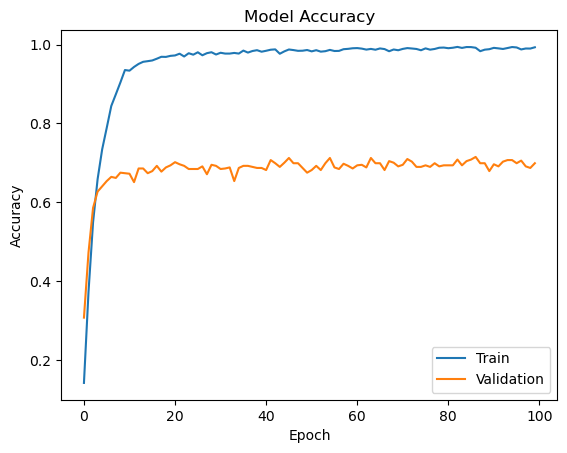

In [10]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Train","Validation"],loc="best")

# Loss Graph

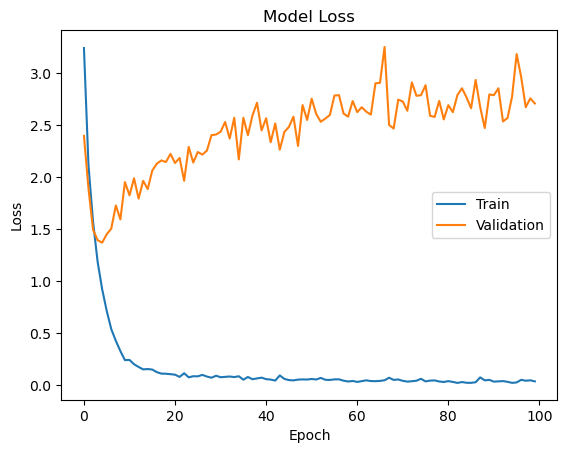

In [11]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Model Loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["Train","Validation"],loc="best")

# Predict On Images

In [12]:
def prepare(filepath):
    img=cv2.imread(filepath,cv2.IMREAD_GRAYSCALE)
    img=cv2.resize(img,(70,70))
    return img.reshape(-1,70,70,1)

1/1 [==============================] - 0s 86ms/step
ace of clubs


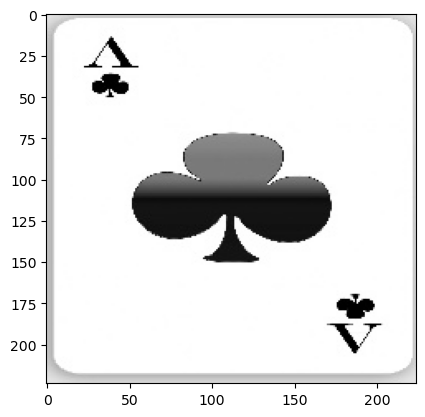

In [13]:
path=r"C:\Users\speed\Documents\Playing Cards Classification TensorFlow CNN\data\test\ace of clubs\2.jpg"
print(classes[int(np.argmax(model.predict(prepare(path))))])
plt.imshow(plt.imread(path))

1/1 [==============================] - 0s 24ms/step
ten of diamonds


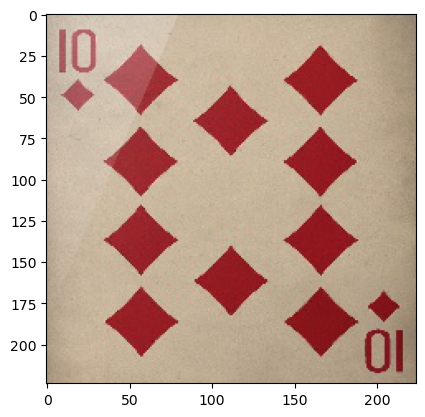

In [14]:
path=r"C:\Users\speed\Documents\Playing Cards Classification TensorFlow CNN\data\test\ten of diamonds\1.jpg"
print(classes[int(np.argmax(model.predict(prepare(path))))])
plt.imshow(plt.imread(path))

1/1 [==============================] - 0s 19ms/step
queen of hearts


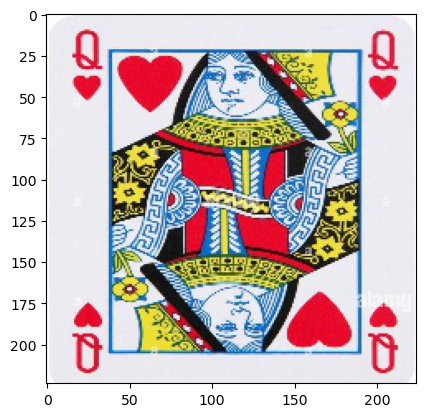

In [15]:
path=r"C:\Users\speed\Documents\Playing Cards Classification TensorFlow CNN\data\test\queen of hearts\5.jpg"
print(classes[int(np.argmax(model.predict(prepare(path))))])
plt.imshow(plt.imread(path))

1/1 [==============================] - 0s 19ms/step
three of hearts


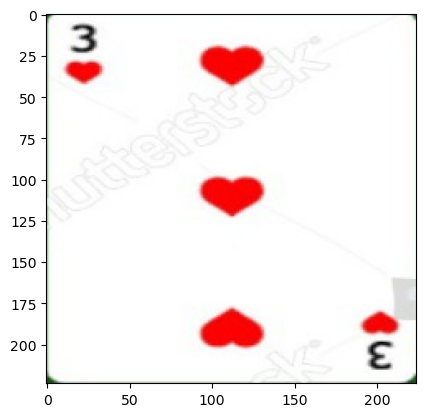

In [22]:
path=r"C:\Users\speed\Documents\Playing Cards Classification TensorFlow CNN\data\test\three of hearts\1.jpg"
print(classes[int(np.argmax(model.predict(prepare(path))))])
plt.imshow(plt.imread(path))

1/1 [==============================] - 0s 20ms/step
two of spades


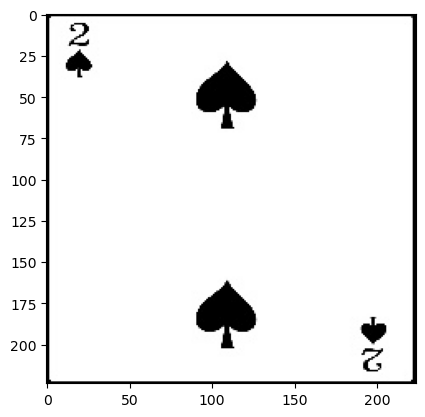

In [17]:
path=r"C:\Users\speed\Documents\Playing Cards Classification TensorFlow CNN\data\test\two of spades\1.jpg"
print(classes[int(np.argmax(model.predict(prepare(path))))])
plt.imshow(plt.imread(path))

1/1 [==============================] - 0s 18ms/step
jack of clubs


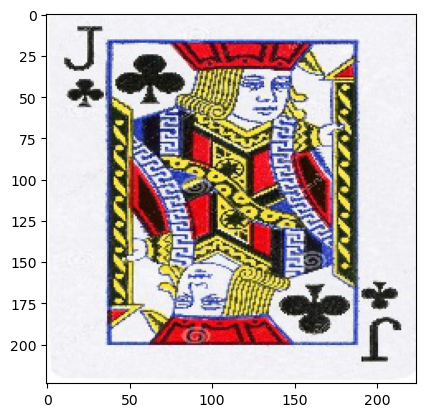

In [18]:
path=r"C:\Users\speed\Documents\Playing Cards Classification TensorFlow CNN\data\test\jack of clubs\4.jpg"
print(classes[int(np.argmax(model.predict(prepare(path))))])
plt.imshow(plt.imread(path))

# Save The Model

In [19]:
model.save("64x3-cards.h5")

# Covert Model To TFLite Model For Edge Devices

In [20]:
tf_lite_converter=tf.lite.TFLiteConverter.from_keras_model(model)
with open("64x3-cards.tflite","wb") as f:
    f.write(tf_lite_converter.convert())

INFO:tensorflow:Assets written to: C:\Users\speed\AppData\Local\Temp\tmp2_5vk780\assets


INFO:tensorflow:Assets written to: C:\Users\speed\AppData\Local\Temp\tmp2_5vk780\assets
